In [1]:
# magic command to reload modules
%load_ext autoreload
%autoreload 2

In [5]:
# append sys.path
import sys
sys.path.append('../src')

from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from simulator.DM_model import DM_model
from parse_data.decode_parameter import decode_mat_fitted_parameters
from parse_data.parse_trial_data import parse_trial_data, compute_subject_acc, correctness_of_array
import os

In [3]:
import matplotlib as mpl
# remove top and right axis from plots
mpl.rcParams["axes.spines.right"] = True
mpl.rcParams["axes.spines.top"] = True

# remove all edges
mpl.rcParams["axes.edgecolor"] = "k"
mpl.rcParams['axes.linewidth'] = 2

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
mpl.rc('font', **font)

In [4]:
!pwd

/Volumes/GoogleDrive/My Drive/02. Master_NSC/02. 2023FS/NSC_Thesis/codes/notebook


## acc (correctness) Subject 正确率 随着时间的变化

In [5]:
path_data = '../../data'
path_trial_data = os.path.join(path_data, 'trials.mat')
trials = parse_trial_data(path_trial_data)
trials.keys()

dict_keys(['pulse', 'dur', 'MS', 'nRight', 'nLeft', 'nPulse', 'hist_nRelse', 'hist_nLelse', 'hist_nRsame', 'hist_nLsame', 'hist_nRoppo', 'hist_nLoppo', 'chooseR', 'subjID', 'correct', 'info'])

In [6]:
acc_t, acc = [], []
for subjectID in range(1,16):
    idx_subj = trials[ 'subjID' ] == subjectID
    correct = trials['correct'][idx_subj]
    if subjectID == 1:
        time_step = 714*3
    elif subjectID == 14:
        time_step = 420*3
    elif subjectID == 13:
        time_step = 500*4
    else:
        time_step = 700*3 # all MS
    
    _acc_t, _acc = compute_subject_acc(correct, in_time=True, time_step=time_step)
    np.set_printoptions(precision=3)
    
    print(f'S{subjectID} Overall acc: {_acc:.3f} acc in time: {np.array(_acc_t)} ')
    acc_t.append(_acc_t)
    acc.append(_acc)

S1 Overall acc: 0.652 acc in time: [0.786 0.699 0.67  0.636 0.609 0.594 0.591] 
S2 Overall acc: 0.805 acc in time: [0.935 0.839 0.822 0.791 0.783 0.741 0.747] 
S3 Overall acc: 0.872 acc in time: [0.957 0.882 0.875 0.871 0.858 0.839 0.836] 
S4 Overall acc: 0.856 acc in time: [0.974 0.878 0.869 0.837 0.833 0.82  0.804] 
S5 Overall acc: 0.786 acc in time: [0.93  0.831 0.78  0.751 0.736 0.758 0.742] 
S6 Overall acc: 0.798 acc in time: [0.946 0.851 0.806 0.782 0.739 0.755 0.741] 
S7 Overall acc: 0.786 acc in time: [0.912 0.822 0.787 0.779 0.763 0.746 0.724] 
S8 Overall acc: 0.876 acc in time: [0.966 0.904 0.883 0.862 0.849 0.847 0.836] 
S9 Overall acc: 0.765 acc in time: [0.883 0.806 0.774 0.749 0.722 0.715 0.726] 
S10 Overall acc: 0.779 acc in time: [0.898 0.795 0.803 0.763 0.739 0.747 0.73 ] 
S11 Overall acc: 0.781 acc in time: [0.938 0.849 0.796 0.775 0.729 0.708 0.705] 
S12 Overall acc: 0.799 acc in time: [0.949 0.827 0.818 0.789 0.764 0.731 0.741] 
S13 Overall acc: 0.679 acc in time: [

(0.5, 1.0)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


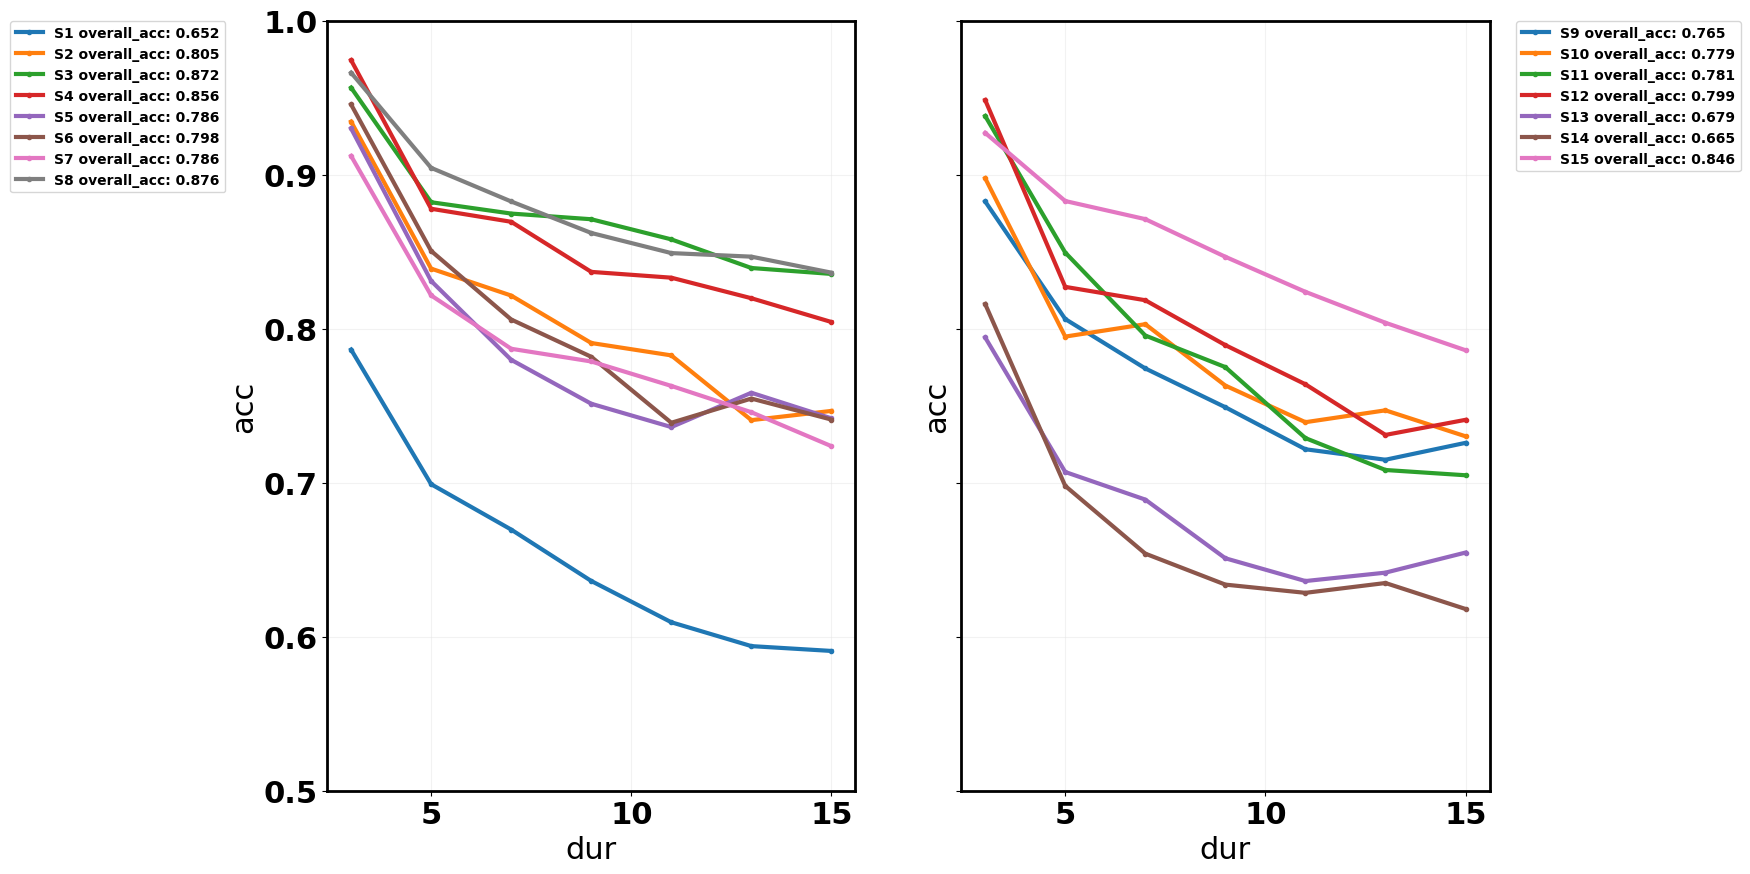

In [7]:
fig, axs = plt.subplots(1,2, figsize=(15,10), sharey=True)
ax = axs[0]
for i in range(0,8):
    ax.plot(np.arange(3,17,2), acc_t[i],'.-', label=f'S{i+1} overall_acc: {acc[i]:.3f}', linewidth=3)
ax.set_xlabel('dur')
ax.set_ylabel('acc')
ax.legend(bbox_to_anchor=(-0.6, 1), loc='upper left', borderaxespad=0., prop={'size': 10})
ax.grid(True, which="major", axis='both', ls="-", color="0.9", alpha=0.5)
ax.set_ylim(0.5,1)

ax = axs[1]
for i in range(8,15):
    ax.plot(np.arange(3,17,2), acc_t[i],'.-', label=f'S{i+1} overall_acc: {acc[i]:.3f}', linewidth=3)
ax.set_xlabel('dur')
ax.set_ylabel('acc')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop={'size': 10})
ax.grid(True, which="major", axis='both', ls="-", color="0.9", alpha=0.5)
ax.set_ylim(0.5,1)
# ax.set_yticks([])


Text(0.5, 1.0, 'duration of trials S15')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


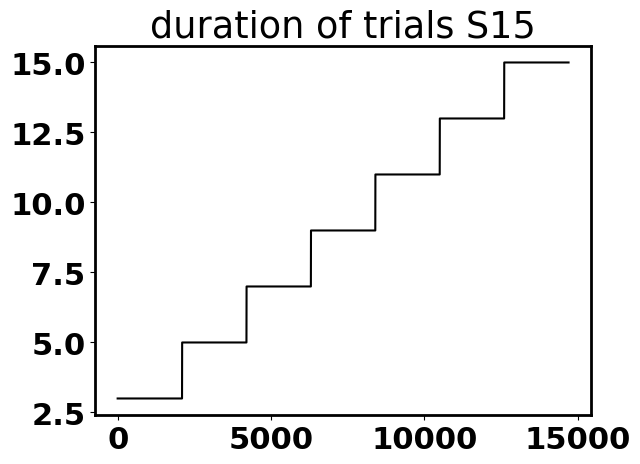

In [8]:
plt.plot(trials['dur'][idx_subj], 'k')
plt.title(f'duration of trials S{subjectID}')

## check S2-S12 的 prior 的范围 - 仅考虑model name 包含L0的数据

In [9]:
import sys
sys.path.append('../src')

from pathlib import Path

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [29]:
import scipy.io as sio
import tabulate as tab

bias = []
sigma2a = []
sigma2i = []
sigma2s = []
L = []
for subjectID in range(1,16):
    data_path = f'../../data/params/263 models fitPars/data_fitPars_S{subjectID}.mat'
    fitted_params = decode_mat_fitted_parameters(data_path)

    _B = fitted_params['BGLS'][:, 0, :]
    _G = fitted_params['BGLS'][:, 1, :]
    _L = fitted_params['BGLS'][:, 2, :]
    _S = fitted_params['BGLS'][:, 3, :]
    _O = fitted_params['BGLS'][:, 4, :]
    _N = fitted_params['BGLS'][:, 5, :]
    
    idx_L0 = ['L0' in i for i in fitted_params['allModelsList']]
    L.append(_L[idx_L0, :][:, 0])

    # bias.append(fitted_params['bias'][idx_L0])
    # sigma2a.append(fitted_params['sigmas'][:,0][idx_L0])
    # sigma2i.append(fitted_params['sigmas'][:,1][idx_L0])
    # sigma2s.append(fitted_params['sigmas'][:,2][idx_L0])

    bias.append(fitted_params['bias'])
    sigma2a.append(fitted_params['sigmas'][:,0])
    sigma2i.append(fitted_params['sigmas'][:,1])
    sigma2s.append(fitted_params['sigmas'][:,2])


In [30]:
# removing S1, S13, S14, S15
idx = [2,3,4,5,6,7,8,9,10,11,12]
bias = np.array(bias)[idx]
bias = list(bias)
sigma2a = np.array(sigma2a)[idx]
sigma2a = list(sigma2a)
sigma2i = np.array(sigma2i)[idx]
sigma2i = list(sigma2i)
sigma2s = np.array(sigma2s)[idx]
sigma2s = list(sigma2s)
L = np.array(L)[idx]
L = list(L)

## plots

         S2     S3     S4     S5     S6     S7     S8     S9    S10    S11    S12
----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
max    0.34   0.19   0.26   0.33   0.18   0.29   0.18   0.33   0.18   0.33   0.32
min   -0.24  -0.12  -0.19  -0.2   -0.36  -0.27  -1.57  -0.95  -1.66  -0.4   -0.83
mean  -0.03   0.02   0.04   0.03  -0.01  -0     -0.18  -0.11  -0.08  -0.03  -0.06
std    0.05   0.03   0.05   0.04   0.03   0.03   0.23   0.14   0.13   0.05   0.1


[Text(1, 0, 'S2'),
 Text(2, 0, 'S3'),
 Text(3, 0, 'S4'),
 Text(4, 0, 'S5'),
 Text(5, 0, 'S6'),
 Text(6, 0, 'S7'),
 Text(7, 0, 'S8'),
 Text(8, 0, 'S9'),
 Text(9, 0, 'S10'),
 Text(10, 0, 'S11'),
 Text(11, 0, 'S12')]

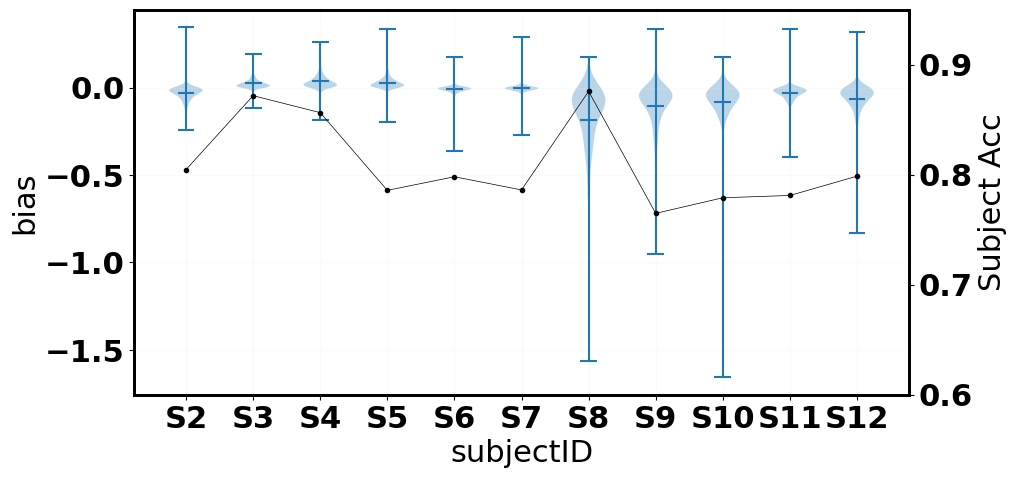

In [31]:
dots = {'marker':'.', 'markersize':1}
# colors for traces
col_min = 2
num_colors = 5
cm1 = mpl.cm.Blues
col1 = [cm1(1.0 * i / num_colors) for i in range(col_min, num_colors)]

fig = plt.figure(figsize=(10,5))
gs = mpl.gridspec.GridSpec(1,1)#, height_ratios=[1, 1])

ax = plt.subplot(gs[0, 0])
# plt.boxplot(bias, showfliers=True, flierprops=dots)
plt.violinplot(bias, showmeans=True, showextrema=True, points=bias[0].shape[0])
plt.xlabel("subjectID")
plt.ylabel("bias")
ax.grid(True, which="major", axis='both', ls="-", color="0.9", alpha=0.2)
# ax.set_xticks(idx)

max_values  = np.round(np.max(bias, axis=1), 2)
min_values  = np.round(np.min(bias, axis=1),2)
mean_values = np.round(np.mean(bias, axis=1),2)
std_values  = np.round(np.std(bias, axis=1),2)

# np show 2 decimal points
np.set_printoptions(precision=2)
rows = [['max', *max_values], ['min', *min_values], ['mean', *mean_values], ['std', *std_values]]
# cols = [f'S{i}' for i in range(1,16)]
cols = [f'S{i}' for i in idx]
print(tab.tabulate(rows, headers=cols, tablefmt='markdown'))

ax2 = ax.twinx()
# ax2.plot(range(1,16), acc, '.-', color='k', linewidth=0.5)
ax2.plot(np.array(idx)-1, np.array(acc)[np.array(idx)-1], '.-', color='k', linewidth=0.5)
ax2.set_ylim([0.6, 0.95])
ax2.set_ylabel('Subject Acc')
ax2.set_xticks(np.array(idx)-1)
ax2.set_xticklabels(cols)

        S2    S3     S4     S5     S6    S7     S8     S9    S10    S11    S12
----  ----  ----  -----  -----  -----  ----  -----  -----  -----  -----  -----
max   7.02  7.49  15.28  14.27  16.63  3.76  14.5   19.25  35.19   4.17  23.82
min   0     0      0.01   0      0     0      0      0      0      0      0
mean  0.32  0.31   0.71   0.45   0.71  0.18   0.54   0.52   0.57   0.12   0.45
std   0.78  0.87   1.94   1.17   2.04  0.46   1.7    1.8    2.79   0.33   1.9


[Text(1, 0, 'S2'),
 Text(2, 0, 'S3'),
 Text(3, 0, 'S4'),
 Text(4, 0, 'S5'),
 Text(5, 0, 'S6'),
 Text(6, 0, 'S7'),
 Text(7, 0, 'S8'),
 Text(8, 0, 'S9'),
 Text(9, 0, 'S10'),
 Text(10, 0, 'S11'),
 Text(11, 0, 'S12')]

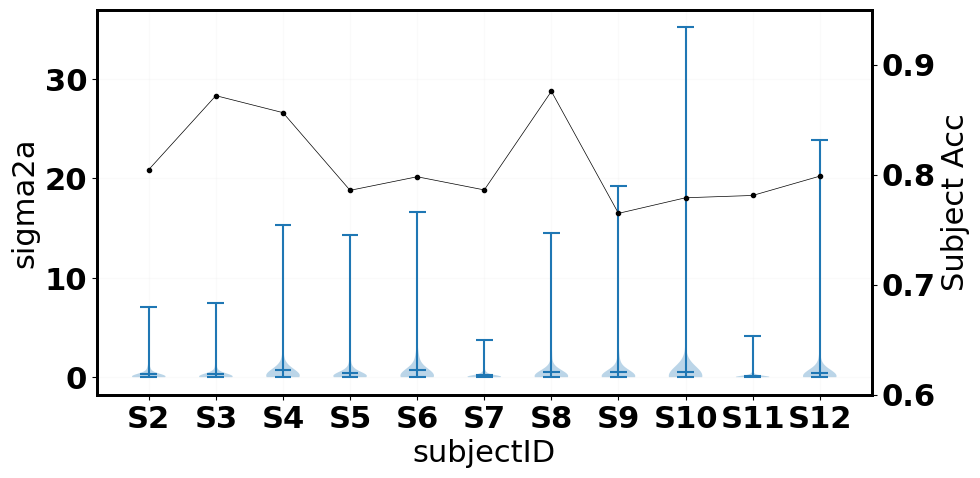

In [32]:
fig = plt.figure(figsize=(10,5))
gs = mpl.gridspec.GridSpec(1,1)#, height_ratios=[1, 1])
ax = plt.subplot(gs[0, 0])
# plt.boxplot(sigma2a, showfliers=True, flierprops=dots)
plt.violinplot(sigma2a, showmeans=True, showextrema=True, points=sigma2a[0].shape[0])
plt.xlabel("subjectID")
plt.ylabel("sigma2a")
ax.grid(True, which="major", axis='both', ls="-", color="0.9", alpha=0.2)

max_values  = np.round(np.max(sigma2a, axis=1), 2)
min_values  = np.round(np.min(sigma2a, axis=1),2)
mean_values = np.round(np.mean(sigma2a, axis=1),2)
std_values  = np.round(np.std(sigma2a, axis=1),2)

# np show 2 decimal points
np.set_printoptions(precision=2)
rows = [['max', *max_values], ['min', *min_values], ['mean', *mean_values], ['std', *std_values]]
# cols = [f'S{i}' for i in range(1,16)]
cols = [f'S{i}' for i in idx]
print(tab.tabulate(rows, headers=cols, tablefmt='markdown'))

ax2 = ax.twinx()
# ax2.plot(range(1,16), acc, '.-', color='k', linewidth=0.5)
ax2.plot(np.array(idx)-1, np.array(acc)[np.array(idx)-1], '.-', color='k', linewidth=0.5)
ax2.set_ylim([0.6, 0.95])
ax2.set_ylabel('Subject Acc')
ax2.set_xticks(np.array(idx)-1)
ax2.set_xticklabels(cols)

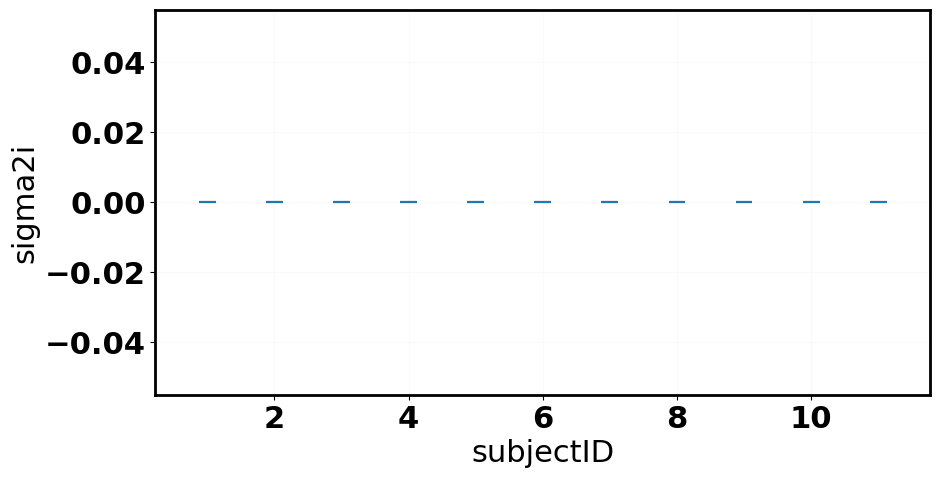

In [33]:
fig = plt.figure(figsize=(10,5))
gs = mpl.gridspec.GridSpec(1,1)#, height_ratios=[1, 1])
ax = plt.subplot(gs[0, 0])
# plt.boxplot(sigma2i, showfliers=True, flierprops=dots)
plt.violinplot(sigma2i, showmeans=True, showextrema=True, points=sigma2i[0].shape[0])
plt.xlabel("subjectID")
plt.ylabel("sigma2i")
ax.grid(True, which="major", axis='both', ls="-", color="0.9", alpha=0.2)

         S2    S3      S4    S5     S6    S7    S8    S9    S10    S11     S12
----  -----  ----  ------  ----  -----  ----  ----  ----  -----  -----  ------
max    0.37  0.4     0.37  0.36   0.37  0.37  0.39  0.35   0.43   0.59    0.4
min   -2.96  0.04  -16.52  0.01  -9.14  0     0.02  0      0      0     -14.88
mean  -0.03  0.18   -0.74  0.23  -0.76  0.12  0.17  0.2    0.34   0.51   -1.18
std    0.29  0.04    1.41  0.04   1.14  0.04  0.05  0.04   0.11   0.1     1.97


[Text(1, 0, 'S2'),
 Text(2, 0, 'S3'),
 Text(3, 0, 'S4'),
 Text(4, 0, 'S5'),
 Text(5, 0, 'S6'),
 Text(6, 0, 'S7'),
 Text(7, 0, 'S8'),
 Text(8, 0, 'S9'),
 Text(9, 0, 'S10'),
 Text(10, 0, 'S11'),
 Text(11, 0, 'S12')]

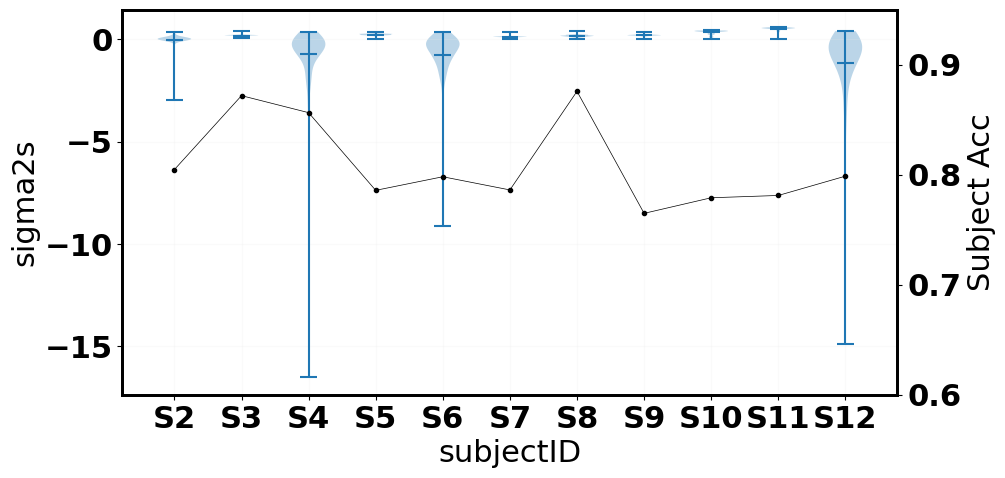

In [34]:
fig = plt.figure(figsize=(10,5))
gs = mpl.gridspec.GridSpec(1,1)#, height_ratios=[1, 1])
ax = plt.subplot(gs[0, 0])
# plt.boxplot(sigma2s, showfliers=True, flierprops=dots)
plt.violinplot(sigma2s, showmeans=True, showextrema=True, points=sigma2s[0].shape[0])
plt.xlabel("subjectID")
plt.ylabel("sigma2s")
ax.grid(True, which="major", axis='both', ls="-", color="0.9", alpha=0.2)

max_values  = np.round(np.max(sigma2s, axis=1), 2)
min_values  = np.round(np.min(sigma2s, axis=1),2)
mean_values = np.round(np.mean(sigma2s, axis=1),2)
std_values  = np.round(np.std(sigma2s, axis=1),2)

# np show 2 decimal points
np.set_printoptions(precision=2)
rows = [['max', *max_values], ['min', *min_values], ['mean', *mean_values], ['std', *std_values]]
cols = [f'S{i}' for i in range(1,16)]
cols = [f'S{i}' for i in idx]
print(tab.tabulate(rows, headers=cols, tablefmt='markdown'))

ax2 = ax.twinx()
# ax2.plot(range(1,16), acc, '.-', color='k', linewidth=0.5)
ax2.plot(np.array(idx)-1, np.array(acc)[np.array(idx)-1], '.-', color='k', linewidth=0.5)
ax2.set_ylim([0.6, 0.95])
ax2.set_ylabel('Subject Acc')
ax2.set_xticks(np.array(idx)-1)
ax2.set_xticklabels(cols)

         S2     S3     S4     S5     S6     S7     S8     S9    S10    S11    S12
----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
max    2.29   1.93   1.29   1.29   1.29   1.73   1.73   1.73   2.29   2.72   2.29
min   -0.43  -0.82  -1.2   -1.17  -0.6   -0.75  -0.62  -0.62  -1.06  -1.01  -0.81
mean   0.06   0.2   -0.58  -0.42  -0.1    0.16   0.19   0.18   0.07   0.29   0.01
std    0.42   0.52   0.32   0.48   0.29   0.42   0.45   0.48   0.64   0.64   0.57


[Text(1, 0, 'S2'),
 Text(2, 0, 'S3'),
 Text(3, 0, 'S4'),
 Text(4, 0, 'S5'),
 Text(5, 0, 'S6'),
 Text(6, 0, 'S7'),
 Text(7, 0, 'S8'),
 Text(8, 0, 'S9'),
 Text(9, 0, 'S10'),
 Text(10, 0, 'S11'),
 Text(11, 0, 'S12')]

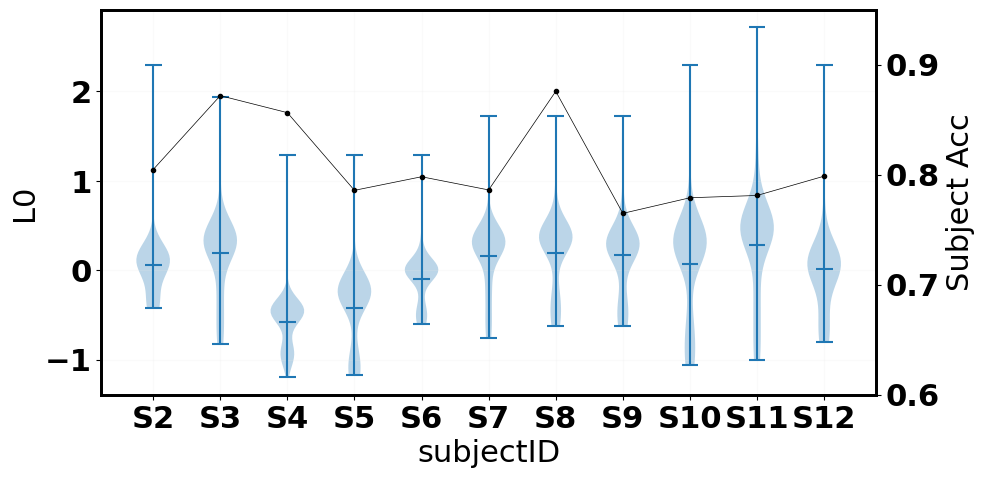

In [35]:
fig = plt.figure(figsize=(10,5))
gs = mpl.gridspec.GridSpec(1,1)#, height_ratios=[1, 1])
ax = plt.subplot(gs[0, 0])
# plt.boxplot(L, showfliers=True, flierprops=dots)
plt.violinplot(L, showmeans=True, showextrema=True, points=L[0].shape[0])
plt.xlabel("subjectID")
plt.ylabel("L0")
ax.grid(True, which="major", axis='both', ls="-", color="0.9", alpha=0.2)

max_values  = np.round(np.max(L, axis=1), 2)
min_values  = np.round(np.min(L, axis=1),2)
mean_values = np.round(np.mean(L, axis=1),2)
std_values  = np.round(np.std(L, axis=1),2)

# np show 2 decimal points
np.set_printoptions(precision=2)
rows = [['max', *max_values], ['min', *min_values], ['mean', *mean_values], ['std', *std_values]]
cols = [f'S{i}' for i in range(1,16)]
cols = [f'S{i}' for i in idx]
print(tab.tabulate(rows, headers=cols, tablefmt='markdown'))

ax2 = ax.twinx()
# ax2.plot(range(1,16), acc, '.-', color='k', linewidth=0.5)
ax2.plot(np.array(idx)-1, np.array(acc)[np.array(idx)-1], '.-', color='k', linewidth=0.5)
ax2.set_ylim([0.6, 0.95])
ax2.set_ylabel('Subject Acc')
ax2.set_xticks(np.array(idx)-1)
ax2.set_xticklabels(cols)

# analysis S1-S15 prior 的范围

In [2]:
import sys
sys.path.append('../src')

from pathlib import Path

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [101]:
import scipy.io as sio
# import tabulate as tab

bias = []
sigma2a = []
sigma2i = []
sigma2s = []
L = []

ALL_MODELS = True

for subjectID in range(1,16):
    data_path = f'../../data/params/263 models fitPars/data_fitPars_S{subjectID}.mat'
    fitted_params = decode_mat_fitted_parameters(data_path)

    _B = fitted_params['BGLS'][:, 0, :]
    _G = fitted_params['BGLS'][:, 1, :]
    _L = fitted_params['BGLS'][:, 2, :]
    _S = fitted_params['BGLS'][:, 3, :]
    _O = fitted_params['BGLS'][:, 4, :]
    _N = fitted_params['BGLS'][:, 5, :]
    
    idx_L0 = ['L0' in i for i in fitted_params['allModelsList']]
    L.append(_L[idx_L0, :][:, 0])

    if ALL_MODELS:
        # all models
        bias.append(fitted_params['bias'])
        sigma2a.append(fitted_params['sigmas'][:,0])
        sigma2i.append(fitted_params['sigmas'][:,1])
        sigma2s.append(fitted_params['sigmas'][:,2])
    
    else:    # models only with L0
        bias.append(fitted_params['bias'][idx_L0])
        sigma2a.append(fitted_params['sigmas'][:,0][idx_L0])
        sigma2i.append(fitted_params['sigmas'][:,1][idx_L0])
        sigma2s.append(fitted_params['sigmas'][:,2][idx_L0])

    

In [102]:
# removing S1, S13, S14, S15
idx = [1,2,3,4,5,6,7,8,9,10,11]
idx = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
bias_ = np.array(bias)[idx]
sigma2a_ = np.array(sigma2a)[idx]
sigma2i_ = np.array(sigma2i)[idx]
sigma2s_ = np.array(sigma2s)[idx]
L_ = np.array(L)[idx]

bias -1.6566694238746043 1.369587270221757
[-0.43649139  0.1946204 ]
sigma2a 0.0005425076223835413 69.4516147487042
[1.41585080e-03 7.06129728e+00]
sigma2s -16.516383599305854 1.3350080067914847
[-3.94299268  0.56735443]
L0 -1.1963748589025585 3.574324389197154
[-1.11028955  1.7278923 ]


Text(0.5, 1.0, 'L0')

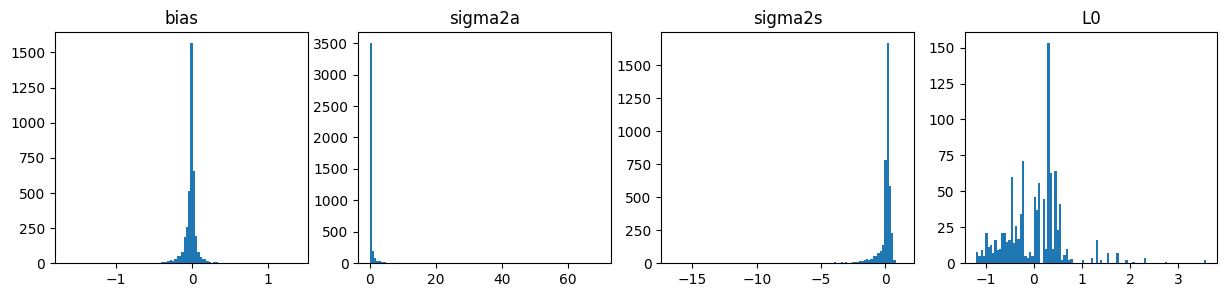

In [103]:
fig, axes = plt.subplots(1,4,figsize=(15,3))
ax = axes[0]
_=ax.hist(bias_.reshape(-1), bins=100)
print('bias', np.min(bias_), np.max(bias_))
print(np.percentile(bias_.reshape(-1), [1, 99]))
ax.set_title('bias')

ax = axes[1]
_=ax.hist(sigma2a_.reshape(-1), bins=100)
print('sigma2a', np.min(sigma2a_), np.max(sigma2a_))
print(np.percentile(sigma2a_.reshape(-1), [1, 99]))
ax.set_title('sigma2a')

ax = axes[2]
_=ax.hist(sigma2s_.reshape(-1), bins=100)
print('sigma2s', np.min(sigma2s_), np.max(sigma2s_))
print(np.percentile(sigma2s_.reshape(-1), [1, 99]))
ax.set_title('sigma2s')

ax = axes[3]
_=ax.hist(L_.reshape(-1), bins=100)
print('L0', np.min(L_), np.max(L_))
print(np.percentile(L_.reshape(-1), [1, 99]))
ax.set_title('L0')

In [32]:
len(fitted_params['allModelsList'])

263

# 物理模型分析 prior range